# 1. Business Case :- Auto Price Prediction

### Problem Statement

***Task 1 :-*** Prepare a complete data analysis report on the given data.

***Task 2 :-*** Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels



# 2. all requirement libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 3. Load My dataset

In [2]:
data = pd.read_csv("auto_imports.csv",  header=None)

# Example list of column names, replace these with actual column names
column_names = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors",
    "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width",
    "height", "curb_weight", "engine_type", "num_cylinders", "engine_size",
    "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
    "city_mpg", "highway_mpg", "price"
]

# Assign the column names to the DataFrame
data.columns = column_names

# Display the updated DataFrame
data.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# 4. Basic check 

In [3]:
# check the rows and columns in dataset
data.shape

(201, 26)

In [4]:
# column of data
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [5]:
# Display the unique column
data.nunique()

symboling              6
normalized_losses     52
make                  22
fuel_type              2
aspiration             2
num_doors              3
body_style             5
drive_wheels           3
engine_location        2
wheel_base            52
length                73
width                 43
height                49
curb_weight          169
engine_type            6
num_cylinders          7
engine_size           43
fuel_system            8
bore                  39
stroke                37
compression_ratio     32
horsepower            59
peak_rpm              23
city_mpg              29
highway_mpg           30
price                186
dtype: int64

In [6]:
# Display the first 5 rows
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# Display the last 5 rows
data.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [8]:
# data types of the column:-
data.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [9]:
# information of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_doors          201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_cylinders      201 non-null    object 
 16  engine_size        201 non

In [10]:
# statistical summary of numerical column
data.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


# insights:-

* symboling:
Mean: 0.83, indicating most cars have a neutral or low risk.
Range: -2 to 3, showing a spread across low to high risk levels.
A wide range of risk levels are available, but most cars have a risk factor around the mean.

* wheel_base:
Range: 86.6 to 120.9, with a large spread.
Cars vary significantly in size, indicating a mix of compact and larger cars.


* length:
Range: 141.1 to 208, with 75% of cars under 183.5.
The dataset includes a range of vehicle lengths, from small to large.

* width:
Range: 60.3 to 72, with most cars near the mean.
Width is fairly consistent across cars, with a slight variation for compact and larger models.

* height:
Range: 47.8 to 59.8, indicating a similar profile height for most cars.
Height doesn’t vary much, suggesting similar styling or vehicle types.

* curb_weight:
Range: 1488 to 4066, with 75% of cars below 2928.
The dataset includes a wide range of car weights, indicating different car sizes and builds.

* engine_size:

Range: 61 to 326, showing a wide spread of engine capacities.
Engines vary significantly, with a mix of smaller, efficient engines and larger, performance-oriented engines.

* compression_ratio:
Range: 7 to 23, with most cars below 9.4.
Compression ratios are diverse, possibly reflecting both economical and high-performance vehicles.

* city_mpg:
Range: 13 to 49, with most cars under 30.
The cars generally have a reasonable fuel efficiency for city driving, with a few outliers on the higher end.

* highway_mpg:
Range: 16 to 54, with most cars under 34.
Highway fuel efficiency is generally better, with many cars achieving higher MPG.

* price:
Range: 5,118 to 45,400, showing a significant price spread.The dataset includes a range from budget to luxury cars, with most cars under 16,500.

In [11]:
num_col = data.select_dtypes(include=['int','float'])
num_col.columns

Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'engine_size', 'compression_ratio', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [12]:
cat_col = data.select_dtypes(include='O')
cat_col.columns

Index(['normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors',
       'body_style', 'drive_wheels', 'engine_location', 'engine_type',
       'num_cylinders', 'fuel_system', 'bore', 'stroke', 'horsepower',
       'peak_rpm'],
      dtype='object')

In [13]:
# check the all  categorical column unique value 
for i in cat_col:
    print(i,cat_col[i].unique())
    print(cat_col[i].value_counts())
    print('______________________________________________________________________________')

normalized_losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
normalized_losses
?      37
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64
______________________________________________________________________________
make ['alfa-romero' 'audi' 'bmw' 'chev

# 5. Domain Analysis:-

* symboling:
 
This column indicates the safety rating of a car. It typically ranges from -3 to +3, where -3 means the car is less risky (lower insurance), and +3 indicates a higher risk (higher insurance premiums).


* normalized_losses:

This column refers to the normalized value of the loss or damage to the vehicle, often used in insurance to assess the vehicle’s potential damage or loss.


* make:

The brand or manufacturer of the car, such as Toyota, BMW, Honda, etc.


* fuel_type:

The type of fuel the car uses, such as Gasoline or Diesel.


* aspiration:

Refers to the type of engine aspiration. For example, Turbo (forced induction) or Standard (naturally aspirated).


* num_doors:

The number of doors the car has. It can be 2 or 4 doors.


* body_style:

The style of the car's body. Examples: Sedan, Hatchback, Wagon, Convertible, etc.


* drive_wheels:

The type of drive system in the car: FWD (Front Wheel Drive), RWD (Rear Wheel Drive), AWD (All Wheel Drive).


* engine_location:

Specifies whether the engine is located in the front or rear of the vehicle.


* wheel_base:

The distance between the front and rear axles of the car. It generally influences the vehicle’s stability and handling.


* length:

The total length of the car.


* width:

The total width of the car.


* height:

The total height of the car.


* curb_weight:

The weight of the car when it is empty, excluding passengers or cargo (curb weight refers to the car with fluids but without load).


* engine_type:

The type of engine in the vehicle. For example, OHC (Overhead Camshaft), DOHC (Dual Overhead Camshaft), etc.


* num_cylinders:

The number of cylinders in the engine. Common numbers are 4, 6, 8 cylinders.


* engine_size:

The displacement of the car's engine, usually measured in liters or cubic centimeters (CC).


* fuel_system:

The fuel delivery system of the car. For example, MPFI (Multi-Point Fuel Injection), which is an advanced fuel injection system.


* bore:

The diameter of each cylinder in the engine.


* stroke:

The length of the piston’s travel inside the cylinder.


* compression_ratio:

The compression ratio in the engine, which affects the engine’s efficiency and power.


* horsepower:

The power output of the engine, typically measured in horsepower (HP), indicating the engine’s performance.


* peak_rpm:

The maximum revolutions per minute (RPM) at which the engine can run, indicating engine speed.


* city_mpg:

The miles per gallon the car achieves in city driving (lower values represent less fuel-efficient driving).


* highway_mpg:

The miles per gallon the car achieves in highway driving (higher values indicate more fuel-efficient driving).


* price:

The price of the car, typically the target variable in datasets like this for prediction or analysis.

# 6. Exploratory Data Analysis:-

##### Univariate Analysis

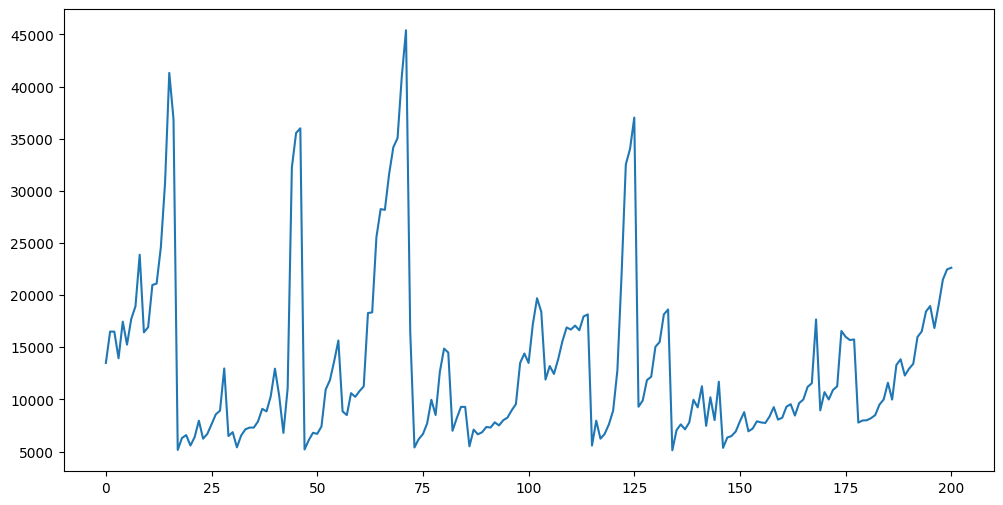

In [14]:
plt.figure(figsize=(12,6))
plt.plot(data['price'])

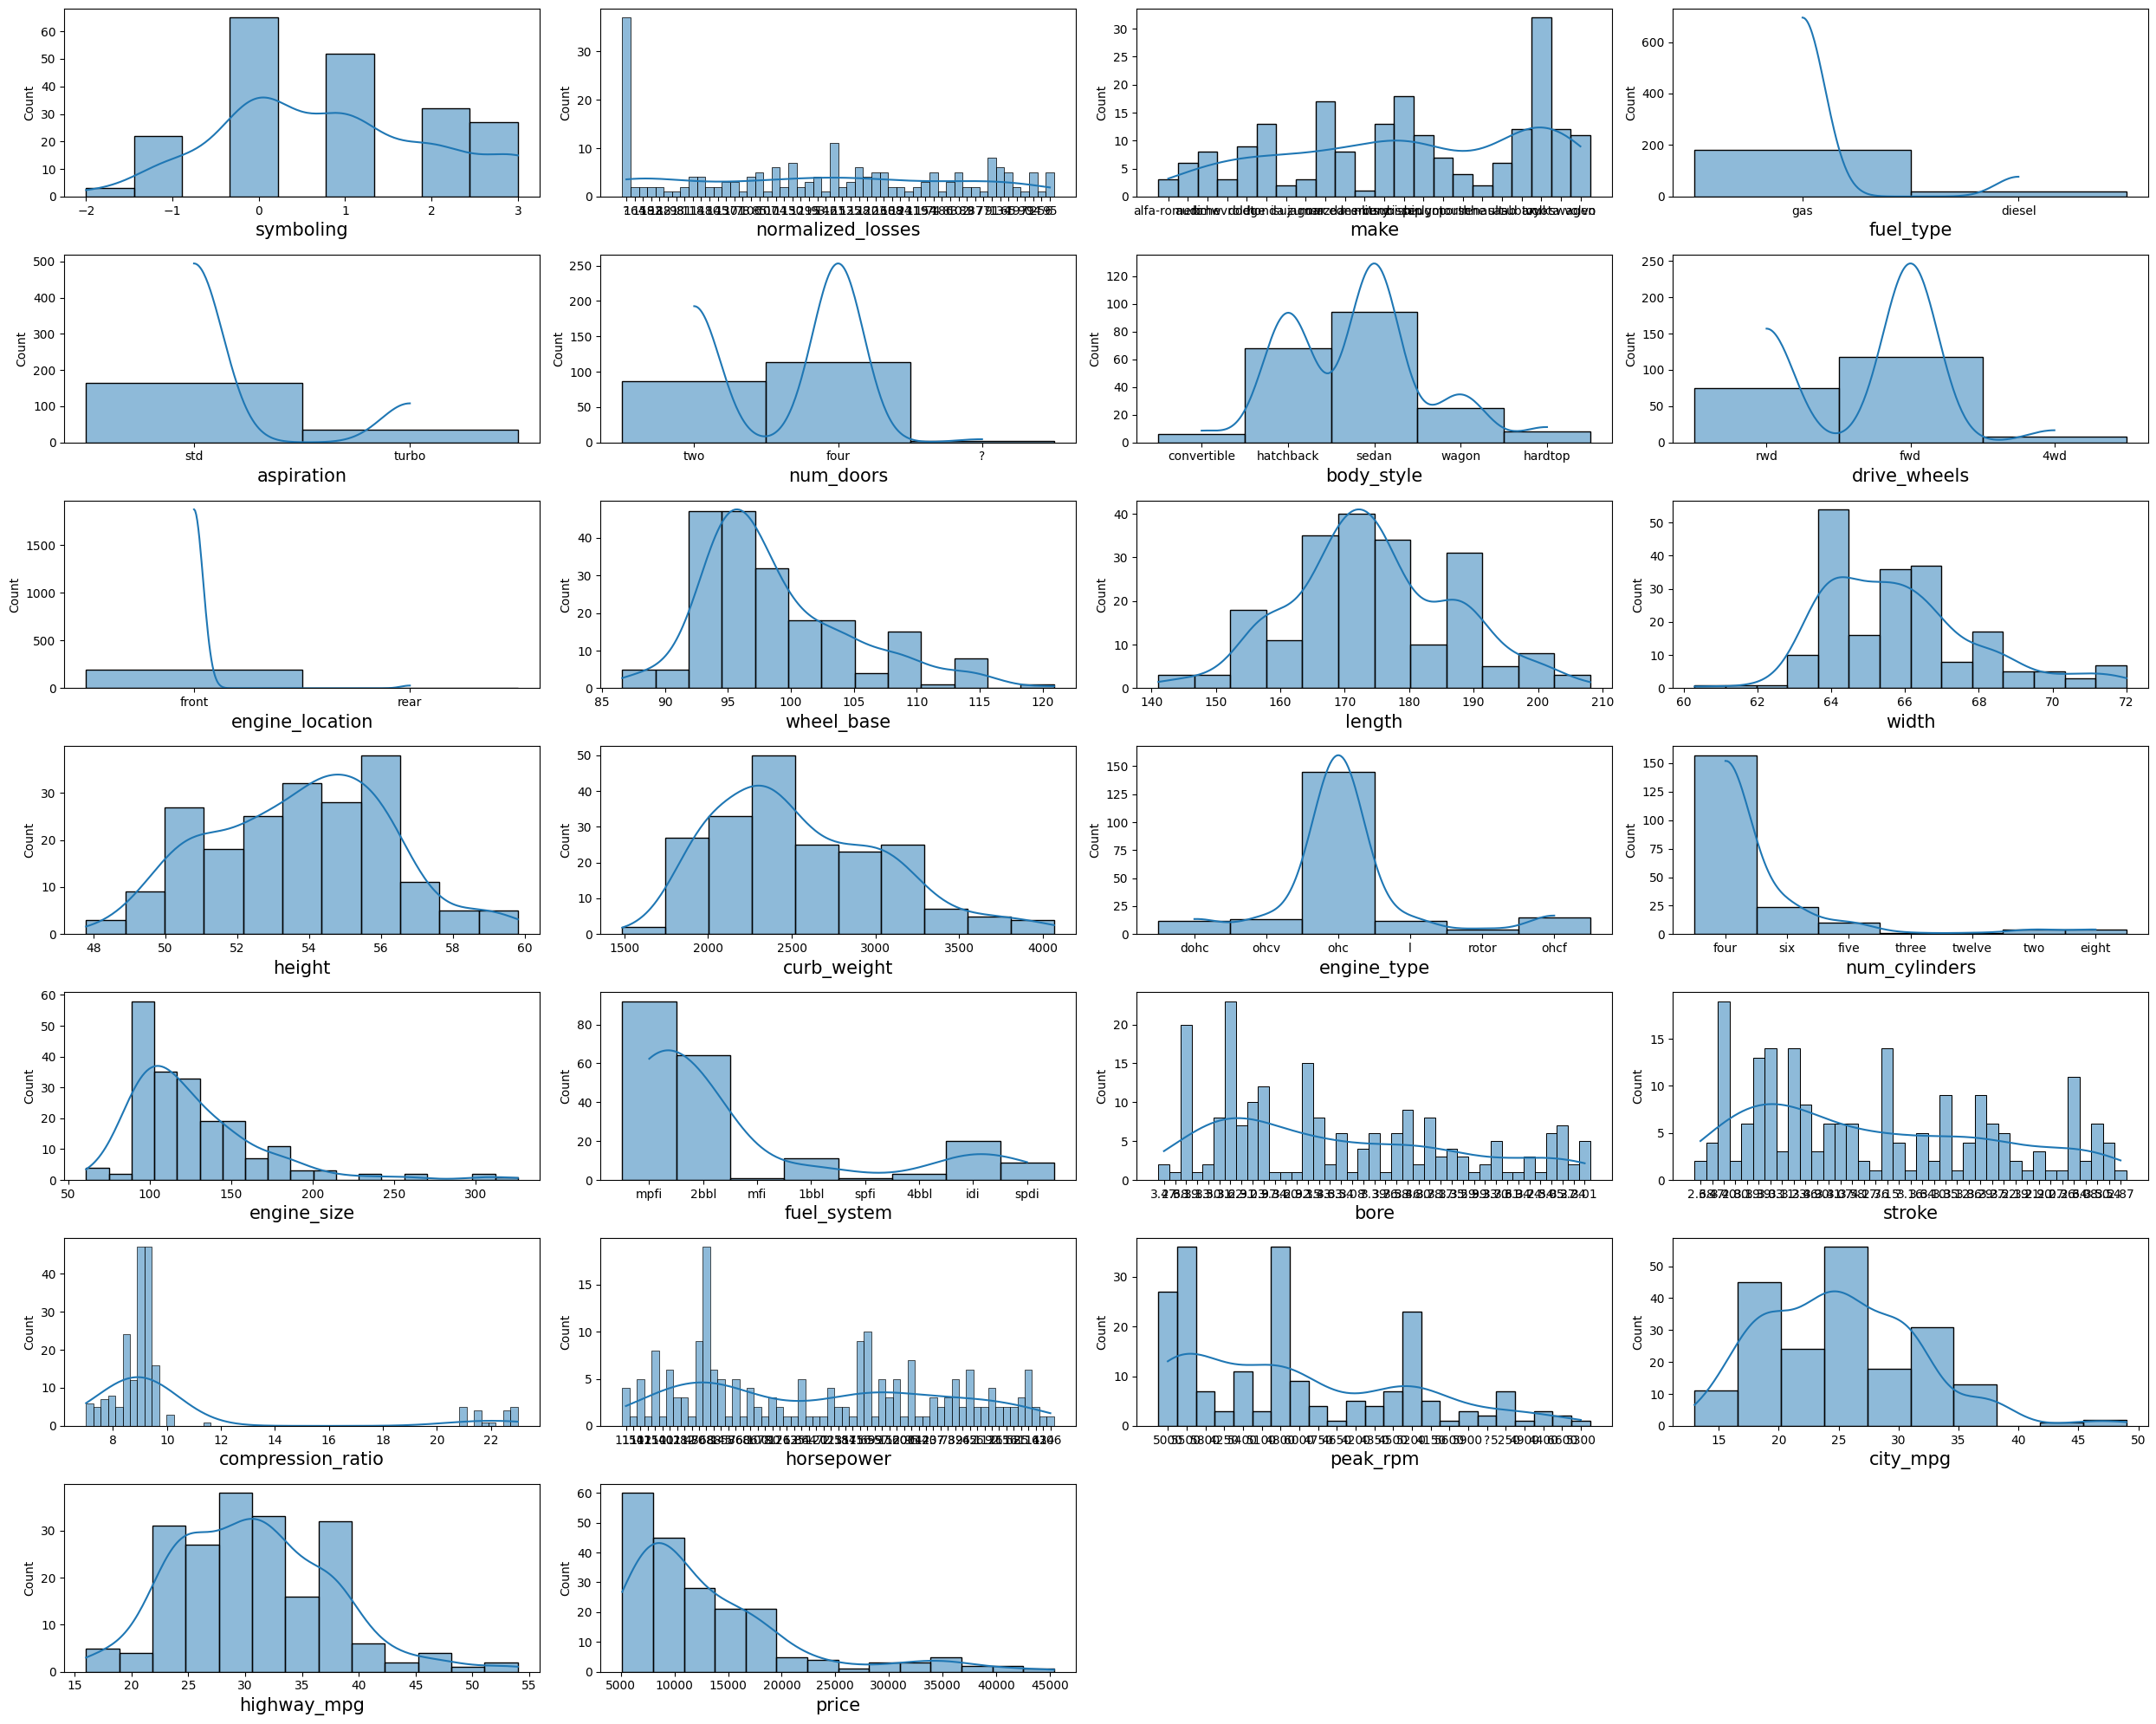

In [15]:
#Plotting histograms for numerical columns
plt.figure(figsize = (25,20) , facecolor = "white")

plotnumber = 1

for i in data:
    if plotnumber<=26:
        ax = plt.subplot(7,4 , plotnumber)
        sns.histplot(x=data[i] , kde = True)
        plt.xlabel(i,fontsize = 15)
    plotnumber +=1
plt.tight_layout()

# insights:-


1. symboling:

The symboling column ranges from -2 to 3, with most cars falling around 0, 1, or 2. The categories -2 and 3 have fewer cars.
* Meaning:
This column might represent a "risk factor," where -2 indicates lower risk and 3 indicates higher risk.


2. normalized_losses:

The distribution is uneven, suggesting missing values or irregularities. Some categories are far more frequent than others.
* Meaning:
The column reflects "normalized losses," but cleaning the data is required before meaningful analysis.


3. make:

This column contains car brands (make). Some brands (e.g., toyota) are very frequent, while others (e.g., alfa-romero) are rare.
* Meaning:
Popular car brands can be identified from this column.


4. fuel_type:

Most cars use gas, while diesel is less common.
* Meaning:
The dataset primarily includes gas cars, with fewer diesel vehicles.


5. aspiration:

The majority of cars have std aspiration, while turbo is less frequent.
* Meaning:
Standard aspiration is more common, and turbocharged cars are relatively rare.


6. body_style:

The sedan body style is the most common, while convertible and hardtop styles are very rare.
* Meaning:
Sedans are highly popular among customers, while convertibles and hardtops might be niche or luxury categories.


7. drive_wheels:

Cars with fwd (front-wheel drive) are most common, while those with 4wd are rare.
* Meaning:
fwd cars are likely more economical and suitable for everyday use.


8. engine_size:

The data is skewed to the right; most cars have smaller engine sizes, while a few have larger engines.
* Meaning:
Smaller engines are common, whereas larger engines likely belong to high-performance or luxury vehicles.


9. wheel_base, length, width:

The data appears bell-shaped, with most cars having average dimensions.
* Meaning:
Most cars are of medium size, and very small or very large cars are uncommon.


10. curb_weight:

The weight distribution is bell-shaped, but a few very heavy cars are visible as outliers.
* Meaning:
Most cars are moderately weighted, while heavier cars likely represent SUVs or luxury vehicles.


11. num_cylinders:

Cars with four cylinders dominate, while twelve cylinders are extremely rare.
* Meaning:
Four-cylinder cars are fuel-efficient and suitable for everyday use, while twelve-cylinder cars are exclusive to luxury or performance categories.


12. fuel_system:

mpfi (multi-point fuel injection) is the most common system, while other systems are less frequent.
* Meaning:
mpfi is widely used in modern cars because it improves fuel efficiency.


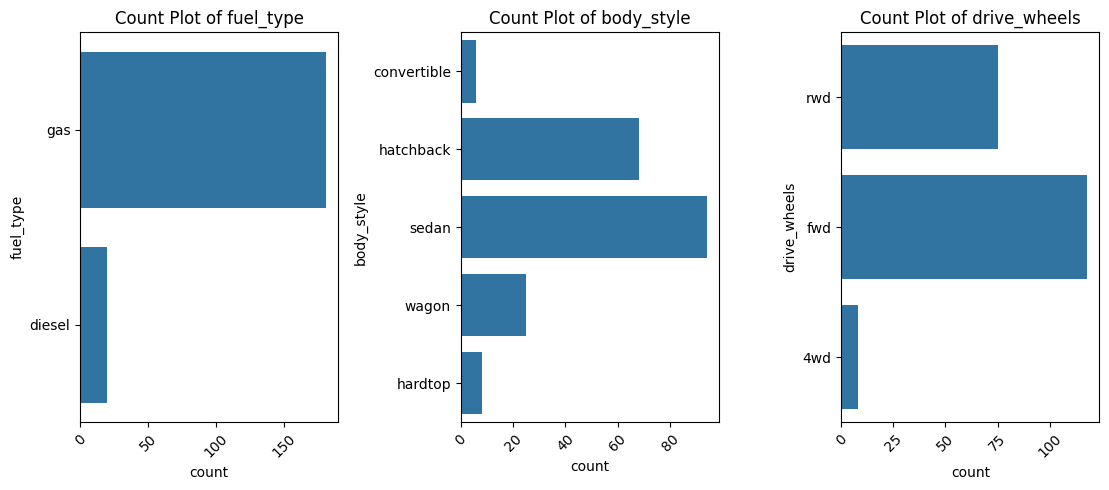

In [16]:
# count plot for categorical column:-
categorical_columns = ["fuel_type", "body_style", "drive_wheels" ]

plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 4, i)
    sns.countplot(data[column])
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Insights:

* The fuel_type distribution can show if the majority of cars are gasoline or diesel. more cars are use the gas.


* Body Style distribution will give insight into the types of cars (sedan, hatchback, etc.) that are more common.
   sedan and hatchback is luxury or performance. and other is prioritize utility .


* Drive Wheels can indicate if most cars are front-wheel, rear-wheel, or all-wheel drive.

# Bivariate analysis:-¶

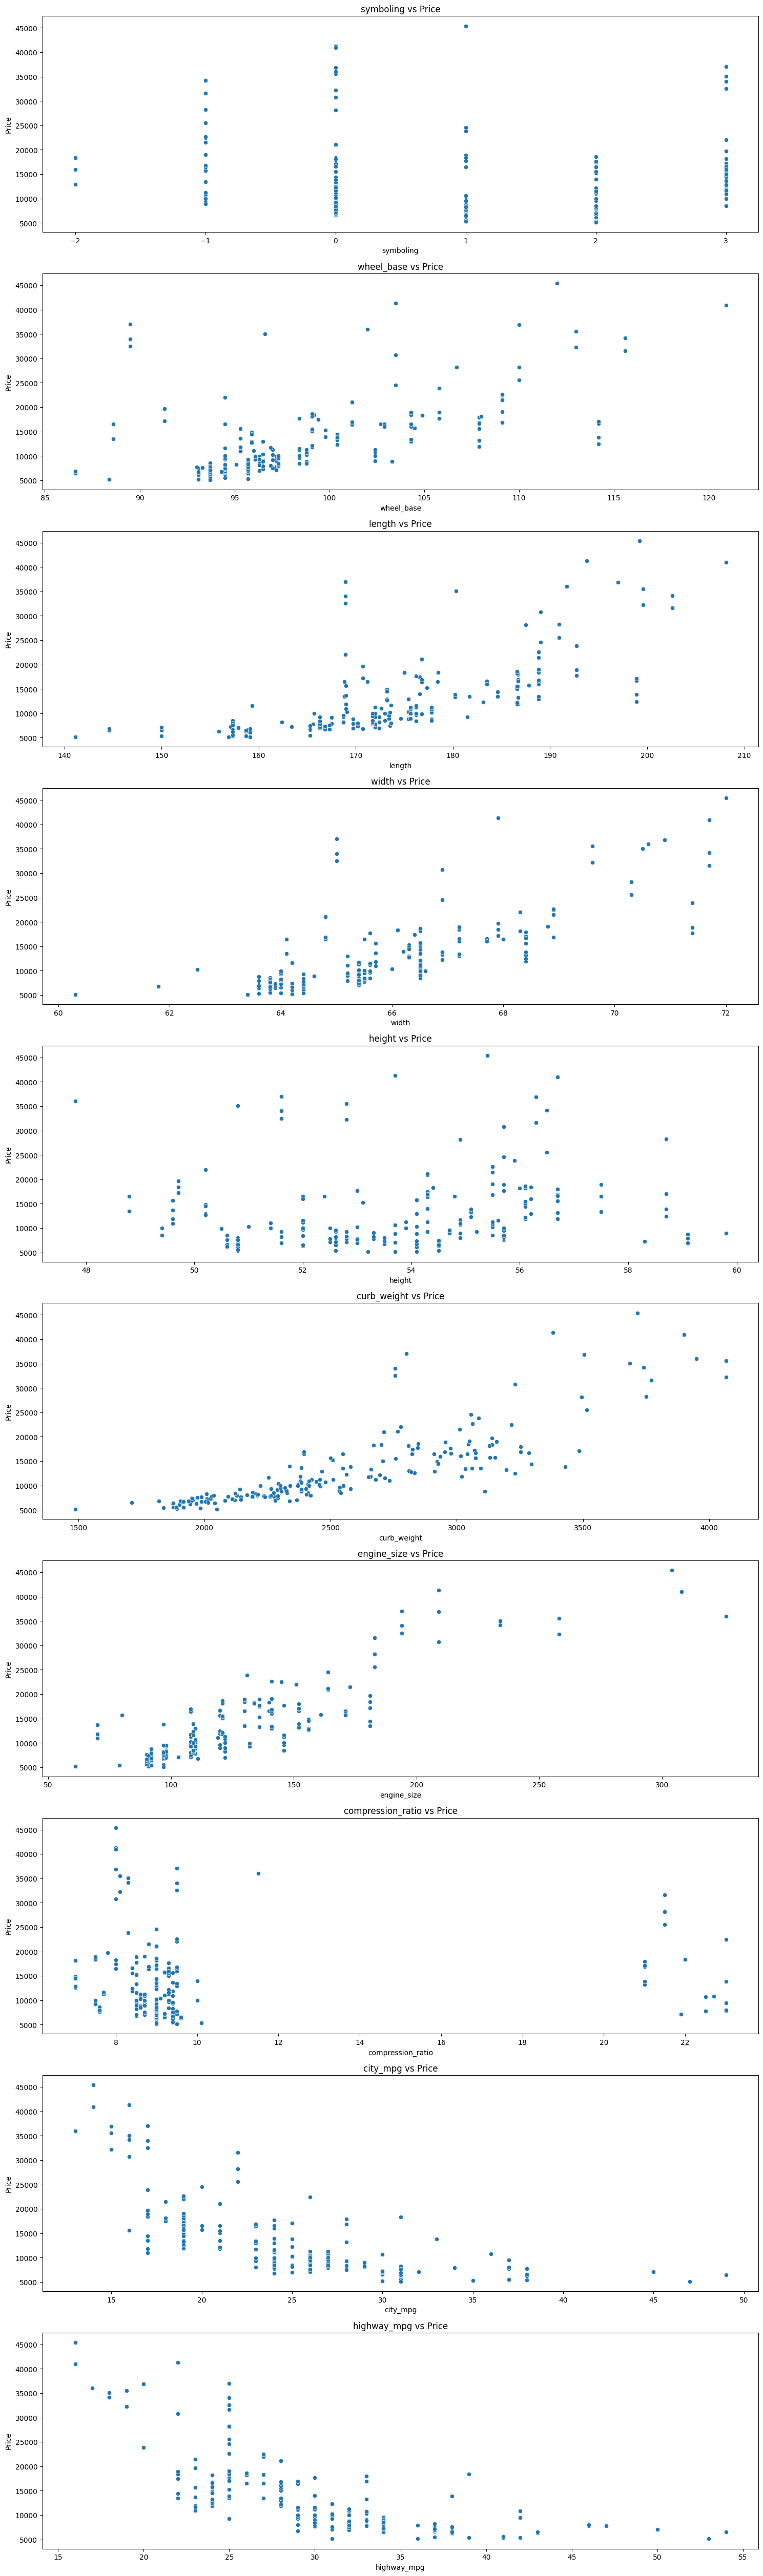

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'price' is your target column
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 5 * len(numerical_columns)))  # Adjust the height based on columns
for i, column in enumerate(numerical_columns):
    if column != 'price':  # Skip the target column itself
        plt.subplot(len(numerical_columns), 1, i+1)
        sns.scatterplot(x=column, y='price', data=data)
        plt.title(f"{column} vs Price")
        plt.xlabel(column)
        plt.ylabel("Price")
plt.tight_layout()
plt.show()


# insights:- 

* city_mpg and highway_mpg vs price:-
  Mileage (mpg) has a negative correlation with price.

* engine_size vs price:-
  engine_size has a strong positive correlation with price.

* curb_weight vs price:-
  curb_weight has a moderate to strong positive relationship with price.

* wheel_base vs price:-
  Slight positive trend visible; premium cars tend to have a longer wheelbase.

* length vs price:-
  Length may indirectly indicate car class or luxury level.

* width vs price:-
  Width has a positive impact on price due to its association with larger vehicle types.

* height vs price:-
  Height has little to no direct correlation with price.


  



# Multivariate analysis:-

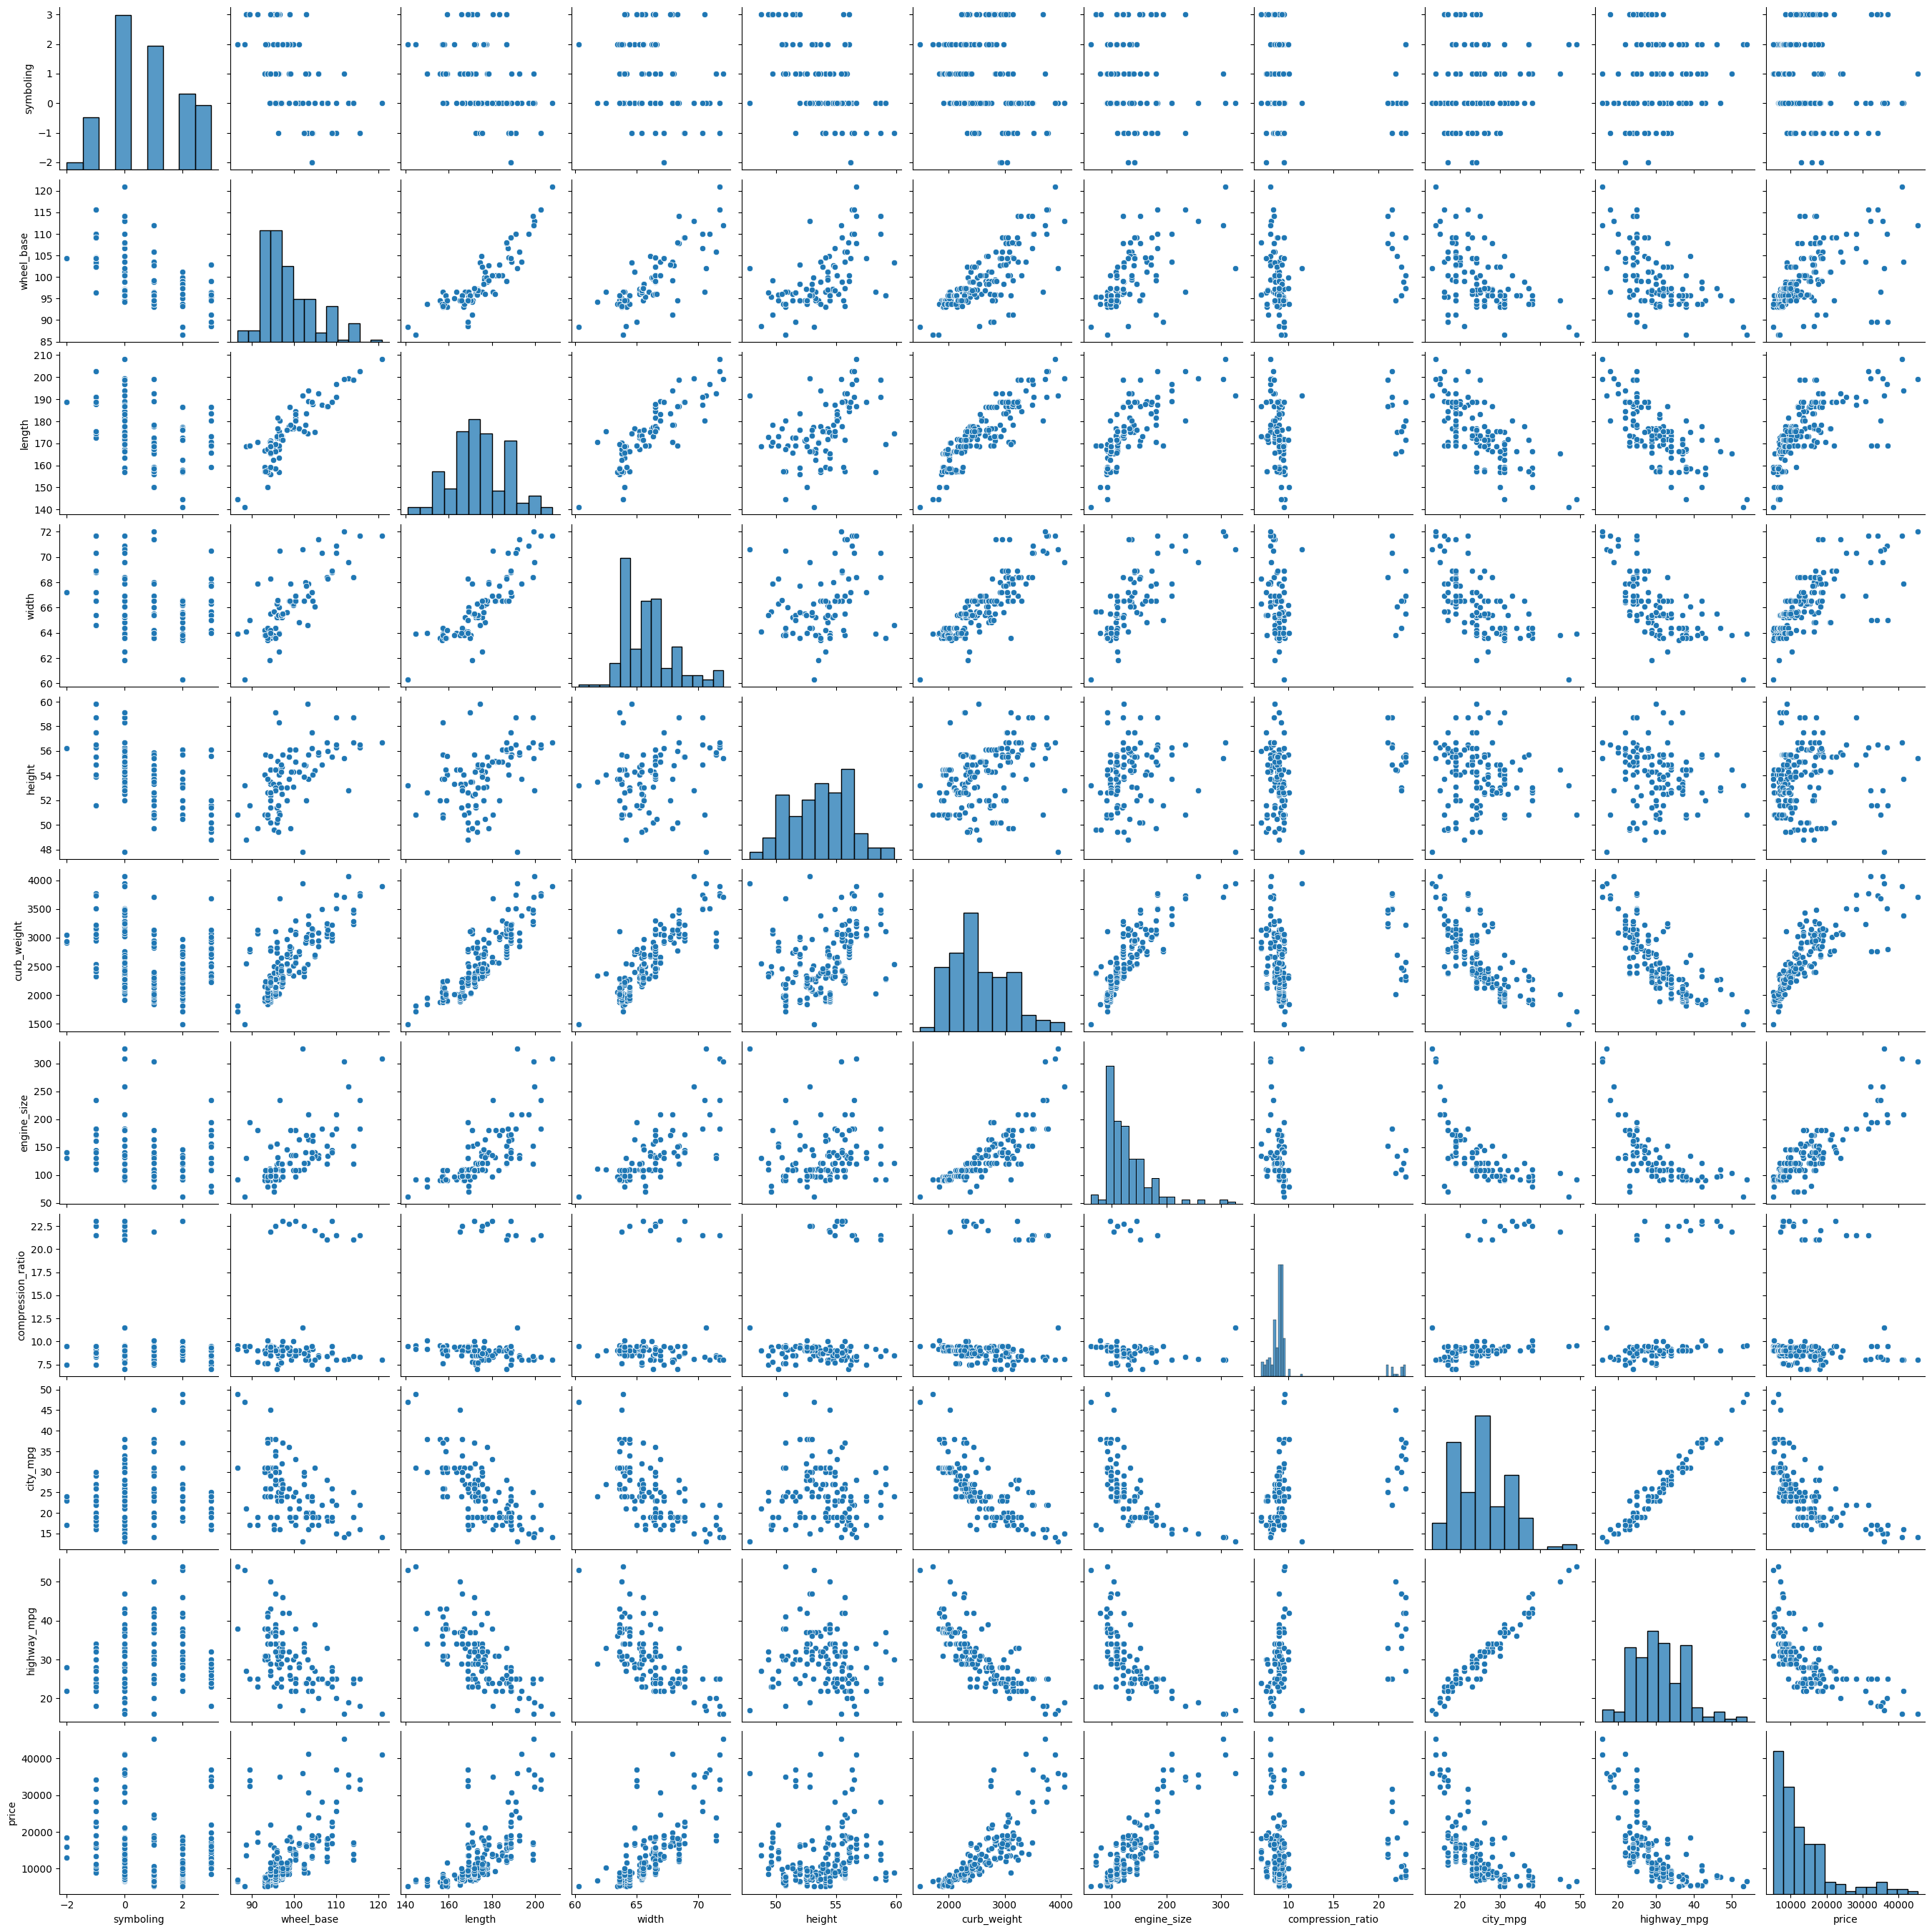

In [18]:
sns.pairplot(data)

# 7 . Data Preprocessing

In [19]:
# step 1 

In [20]:
# handle the "?" with nan value

In [21]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [22]:
# check the all  categorical column unique value 
for i in data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print('_________________________________________________________________________________________')

symboling [ 3  1  2  0 -1 -2]
symboling
 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
_________________________________________________________________________________________
normalized_losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
normalized_losses
?      37
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231

In [23]:
# normalized_losses ,  num_doors ,  bore , stroke , horsepower , peak_rpm

In [24]:
# normalized_losses

In [25]:
data['normalized_losses'] = data['normalized_losses'].replace('?', '256')

In [26]:
# num_doors

In [27]:
data['num_doors'] = data['num_doors'].replace('?', 'four')

In [28]:
# bore

In [29]:
data['bore'] = data['bore'].replace('?', '3.35')

In [30]:
# stroke

In [31]:
data['stroke'] = data['stroke'].replace('?', '3.47')

In [32]:
# horsepower

In [33]:
data['horsepower'] = data['horsepower'].replace('?', '156')

In [34]:
# peak_rpm

In [35]:
data['peak_rpm'] = data['peak_rpm'].replace('?', '4400')

In [36]:
# after removing this "?" no check the all unique value

In [37]:
# check the all  categorical column unique value 
for i in data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print('_________________________________________________________________________________________')

symboling [ 3  1  2  0 -1 -2]
symboling
 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
_________________________________________________________________________________________
normalized_losses ['256' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145'
 '137' '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93'
 '142' '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119'
 '154' '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90'
 '94' '95']
normalized_losses
256    38
161    11
91      8
150     7
128     6
134     6
104     6
95      5
85      5
103     5
74      5
102     5
168     5
94      5
65      5
93      4
106     4
122     4
148     4
118     4
125     3
154     3
137     3
101     3
83      3
115     3
119     2
194     2
108     2
197     2
87      2
89      2
158     2
192     2
113     2
188     2
81      2
110     2
145     2
129     2
164     2
153     2
186     1
107     1
78      1
231    

In [38]:
# step 2:- 

In [39]:
# change the datatype

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_doors          201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_cylinders      201 non-null    object 
 16  engine_size        201 non

In [41]:
## to change the datatype:-

#normalized_losses
# normalized_losses
# num_doors
# bore
# stroke
# horsepower
# peak_rpm

In [42]:
data["normalized_losses"] = data["normalized_losses"].astype("int64")
data["bore"] = data["bore"].astype("float64")
data["stroke"] = data["stroke"].astype("float64")
data["peak_rpm"] = data["peak_rpm"].astype("int64")
data["horsepower"] = data["horsepower"].astype("int64")

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_doors          201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_cylinders      201 non-null    object 
 16  engine_size        201 non

In [44]:
# step 3:-

In [45]:
# to check the duplicate value:-

In [46]:
data.duplicated().sum()

0

In [47]:
# no duplicate value

In [48]:
# step 4:-

In [49]:
# check and handle outliers

In [50]:
# plt.figure(figsize = (25,20))
# plotnumber = 1

# for i in data:
#     if plotnumber<=26:
#         ax = plt.subplot(7 , 4 , plotnumber)
#         sns.boxplot(x = data[i])
#         plt.xlabel(i , fontsize = 15)
#     plotnumber +=1
# plt.tight_layout()

In [51]:
# wheel_base

In [52]:
q1 = data["wheel_base"].quantile(0.25)
print(q1)

q3 = data['wheel_base'].quantile(0.75)
print(q3)

94.5
102.4


In [53]:
IQR = q3 - q1
print(IQR)

7.900000000000006


In [54]:
min_range = q1 - (1.5 * IQR)
print(min_range)

max_range = q3 + (1.5 * IQR)
print(max_range)

82.64999999999999
114.25000000000001


In [55]:
data.loc[data["wheel_base"]<min_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [56]:
data.loc[data["wheel_base"]>max_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
67,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
68,-1,256,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184
70,0,256,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960


In [57]:
data.loc[data["wheel_base"]>max_range , "wheel_base"] = data["wheel_base"].median()

In [58]:
# length

In [59]:
q1 = data["length"].quantile(0.25)
print(q1)

q3 = data['length'].quantile(0.75)
print(q3)

166.8
183.5


In [60]:
IQR = q3 - q1
print(IQR)

16.69999999999999


In [61]:
min_range = q1 - (1.5 * IQR)
print(min_range)

max_range = q3 + (1.5 * IQR)
print(max_range)

141.75000000000003
208.54999999999998


In [62]:
data.loc[data["length"]<min_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
17,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151


In [63]:
data.loc[data["length"]>max_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [64]:
data.loc[data["length"]<min_range , "length"] = data["length"].median()

In [65]:
# width

In [66]:
q1 = data["width"].quantile(0.25)
print(q1)

q3 = data['width'].quantile(0.75)
print(q3)

64.1
66.6


In [67]:
IQR = q3 - q1
print(IQR)

2.5


In [68]:
min_range = q1 - (1.5 * IQR)
print(min_range)

max_range = q3 + (1.5 * IQR)
print(max_range)

60.349999999999994
70.35


In [69]:
data.loc[data["width"]<min_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
17,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151


In [70]:
data.loc[data["width"]>max_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,256,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
16,0,256,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
46,0,256,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000
67,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,97.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
68,-1,256,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184
69,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056
70,0,256,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960
71,1,256,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400


In [71]:
data.loc[data["width"]>max_range , "width"] = data["width"].median()

In [72]:
data.loc[data["width"]<min_range , "width"] = data["width"].median()

In [73]:
# curb_weight

In [74]:
q1 = data["curb_weight"].quantile(0.25)
print(q1)
q3 = data["curb_weight"].quantile(0.75)
print(q3)

2169.0
2926.0


In [75]:
IQR = q3 - q1
print(IQR)

757.0


In [76]:
min_range = q1 - (1.5 * IQR)
print(min_range)

max_range = q3 + (1.5 * IQR)
print(max_range)

1033.5
4061.5


In [77]:
data.loc[data["curb_weight"]>max_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
44,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250
45,0,256,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550


In [78]:
data.loc[data['curb_weight']<min_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [79]:
#imputing  the outliers using median
data.loc[data['curb_weight']>max_range,'curb_weight']=data['curb_weight'].median()

In [80]:
# engine_size

In [81]:
q1 =data["engine_size"].quantile(0.25)
print(q1)
q3= data["engine_size"].quantile(0.75)
print(q3)

98.0
141.0


In [82]:
IQR = q3 - q1
print(IQR)

43.0


In [83]:
min_range = q1 - (1.5 * IQR)
print(min_range)

max_range = q3 + (1.5 * IQR)
print(max_range)

33.5
205.5


In [84]:
data.loc[data["engine_size"]<min_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [85]:
data.loc[data["engine_size"]>max_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
14,0,256,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
15,0,256,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
16,0,256,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
44,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250
45,0,256,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550
46,0,256,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000
68,-1,256,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184
69,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056
70,0,256,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960
71,1,256,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400


In [86]:
data.loc[data["engine_size"]>max_range , "engine_size"]=data["engine_size"].median()

In [87]:
# stroke

In [88]:
q1 = data["stroke"].quantile(0.25)
print(q1)

q3 = data['stroke'].quantile(0.75)
print(q3)

3.11
3.46


In [89]:
IQR = q3 - q1
print(IQR)

0.3500000000000001


In [90]:
min_range = q1 - (1.5 * IQR)
print(min_range)

max_range = q3 + (1.5 * IQR)
print(max_range)

2.585
3.9850000000000003


In [91]:
data.loc[data["stroke"]<min_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
108,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580
110,0,256,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695
130,3,150,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040
134,2,83,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118


In [92]:
data.loc[data["stroke"]>max_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
44,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,120,mpfi,3.63,4.17,8.1,176,4750,15,19,32250
45,0,256,jaguar,gas,std,four,sedan,rwd,front,113.0,...,120,mpfi,3.63,4.17,8.1,176,4750,15,19,35550


In [93]:
data.loc[data["stroke"]>max_range , "stroke"] = data["stroke"].median()

In [94]:
data.loc[data["stroke"]<min_range , "stroke"] = data["stroke"].median()

In [95]:
# compression_ratio

In [96]:
q1 = data["compression_ratio"].quantile(0.25)
print(q1)

q3 = data['compression_ratio'].quantile(0.75)
print(q3)

8.6
9.4


In [97]:
IQR = q3 - q1
print(IQR)

0.8000000000000007


In [98]:
min_range = q1 - (1.5 * IQR)
print(min_range)

max_range = q3 + (1.5 * IQR)
print(max_range)

7.399999999999999
10.600000000000001


In [99]:
data.loc[data["compression_ratio"]<min_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
28,3,145,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964
79,3,256,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629
80,3,256,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14869
81,3,256,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14489
114,0,161,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142,5600,18,24,18150
121,3,256,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764


In [100]:
data.loc[data["compression_ratio"]>max_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
46,0,256,jaguar,gas,std,two,sedan,rwd,front,102.0,...,120,mpfi,3.54,2.76,11.5,262,5000,13,17,36000
60,0,256,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
63,0,256,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344
64,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
65,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
66,0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
67,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,97.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
87,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
105,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200
107,0,256,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95,4150,25,25,13860


In [101]:
data.loc[data["compression_ratio"]>max_range , "compression_ratio"] = data["compression_ratio"].median()

In [102]:
data.loc[data["compression_ratio"]<min_range , "compression_ratio"] = data["compression_ratio"].median()

In [103]:
# horsepower

In [104]:
q1 = data["horsepower"].quantile(0.25)
print(q1)

q3 = data['horsepower'].quantile(0.75)
print(q3)

70.0
116.0


In [105]:
IQR = q3 - q1
print(IQR)

46.0


In [106]:
min_range = q1 - (1.5 * IQR)
print(min_range)

max_range = q3 + (1.5 * IQR)
print(max_range)

1.0
185.0


In [107]:
data.loc[data["horsepower"]<min_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [108]:
data.loc[data["horsepower"]>max_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
46,0,256,jaguar,gas,std,two,sedan,rwd,front,102.0,...,120,mpfi,3.54,2.76,9.0,262,5000,13,17,36000
102,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
123,3,256,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528
124,3,256,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028
125,3,256,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028


In [109]:
data.loc[data["horsepower"]>max_range , "horsepower"] = data["horsepower"].median()

In [110]:
# peak_rpm

In [111]:
q1 = data["peak_rpm"].quantile(0.25)
print(q1)

q3 = data['peak_rpm'].quantile(0.75)
print(q3)

4800.0
5500.0


In [112]:
IQR = q3 - q1
print(IQR)

700.0


In [113]:
min_range = q1 - (1.5 * IQR)
print(min_range)

max_range = q3 + (1.5 * IQR)
print(max_range)

3750.0
6550.0


In [114]:
data.loc[data["peak_rpm"]<min_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [115]:
data.loc[data["peak_rpm"]>max_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
161,1,168,toyota,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9298
162,1,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9538


In [116]:
data.loc[data["peak_rpm"]>max_range , "peak_rpm"] = data["peak_rpm"].median()

In [117]:
# city_mpg

In [118]:
q1 = data["city_mpg"].quantile(0.25)
print(q1)

q3 = data['city_mpg'].quantile(0.75)
print(q3)

19.0
30.0


In [119]:
IQR = q3 - q1
print(IQR)

11.0


In [120]:
min_range = q1 - (1.5 * IQR)
print(min_range)

max_range = q3 + (1.5 * IQR)
print(max_range)

2.5
46.5


In [121]:
data.loc[data["city_mpg"]<min_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [122]:
data.loc[data["city_mpg"]>max_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
17,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
29,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479


In [123]:
data.loc[data["city_mpg"]>max_range , "city_mpg"] = data["city_mpg"].median()

In [124]:
# highway_mpg

In [125]:
q1 = data["highway_mpg"].quantile(0.25)
print(q1)

q3 = data['highway_mpg'].quantile(0.75)
print(q3)

25.0
34.0


In [126]:
IQR = q3 - q1
print(IQR)

9.0


In [127]:
min_range = q1 - (1.5 * IQR)
print(min_range)

max_range = q3 + (1.5 * IQR)
print(max_range)

11.5
47.5


In [128]:
data.loc[data["highway_mpg"]<min_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [129]:
data.loc[data["highway_mpg"]>max_range]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
17,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,24,53,5151
29,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,24,54,6479
87,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,9.0,55,4800,45,50,7099


In [130]:
data.loc[data["highway_mpg"]>max_range , "highway_mpg"] = data["highway_mpg"].median()

In [131]:
# remove all outliers

In [132]:
# handle if it percentage is less than 5

In [133]:
# step 5:-

In [134]:
# scaling the continuous data:-

In [135]:

from sklearn.preprocessing import StandardScaler

# Numeric columns (e.g., engine_size, horsepower, etc.)
numeric_columns = ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
                   'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 
                   'highway_mpg']

# Apply StandardScaler for feature scaling
scaler = StandardScaler()

# Scale the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Print the scaled DataFrame
print(data.head())

##########


   symboling  normalized_losses         make fuel_type aspiration num_doors  \
0   1.725050           1.793662  alfa-romero       gas        std       two   
1   1.725050           1.793662  alfa-romero       gas        std       two   
2   0.127193           1.793662  alfa-romero       gas        std       two   
3   0.926121           0.284361         audi       gas        std      four   
4   0.926121           0.284361         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front   -1.767358  ...     0.353915   
1  convertible          rwd           front   -1.767358  ...     0.353915   
2    hatchback          rwd           front   -0.713342  ...     1.145525   
3        sedan          fwd           front    0.233485  ...    -0.401712   
4        sedan          4wd           front    0.162026  ...     0.569809   

   fuel_system      bore    stroke compression_ratio horsepowe

In [136]:
# step 6:- 

In [137]:
# conversion of categorical data into numerical data

In [138]:
# Categorical columns list
categorical_columns = ['fuel_system', 'num_cylinders', 'engine_type', 'drive_wheels', 
                       'body_style', 'num_doors', 'engine_location', 'aspiration', 
                       'fuel_type', 'make']

# Apply One-Hot Encoding to categorical columns using get_dummies()
data= pd.get_dummies(data, columns=categorical_columns)

# Resulting DataFrame with One-Hot encoded columns
print(data.head())



   symboling  normalized_losses  wheel_base    length     width    height  \
0   1.725050           1.793662   -1.767358 -0.460824 -0.929196 -2.034081   
1   1.725050           1.793662   -1.767358 -0.460824 -0.929196 -2.034081   
2   0.127193           1.793662   -0.713342 -0.261932 -0.076094 -0.559713   
3   0.926121           0.284361    0.233485  0.185575  0.350457  0.218425   
4   0.926121           0.284361    0.162026  0.185575  0.472328  0.218425   

   curb_weight  engine_size      bore    stroke  ...  make_nissan  \
0     0.017775     0.353915  0.519433 -2.254920  ...        False   
1     0.017775     0.353915  0.519433 -2.254920  ...        False   
2     0.575072     1.145525 -2.434747  0.743897  ...        False   
3    -0.409823    -0.401712 -0.527618  0.478179  ...        False   
4     0.577098     0.569809 -0.527618  0.478179  ...        False   

   make_peugot  make_plymouth  make_porsche  make_renault  make_saab  \
0        False          False         False       

# 8 . feature selection:-

<Axes: >

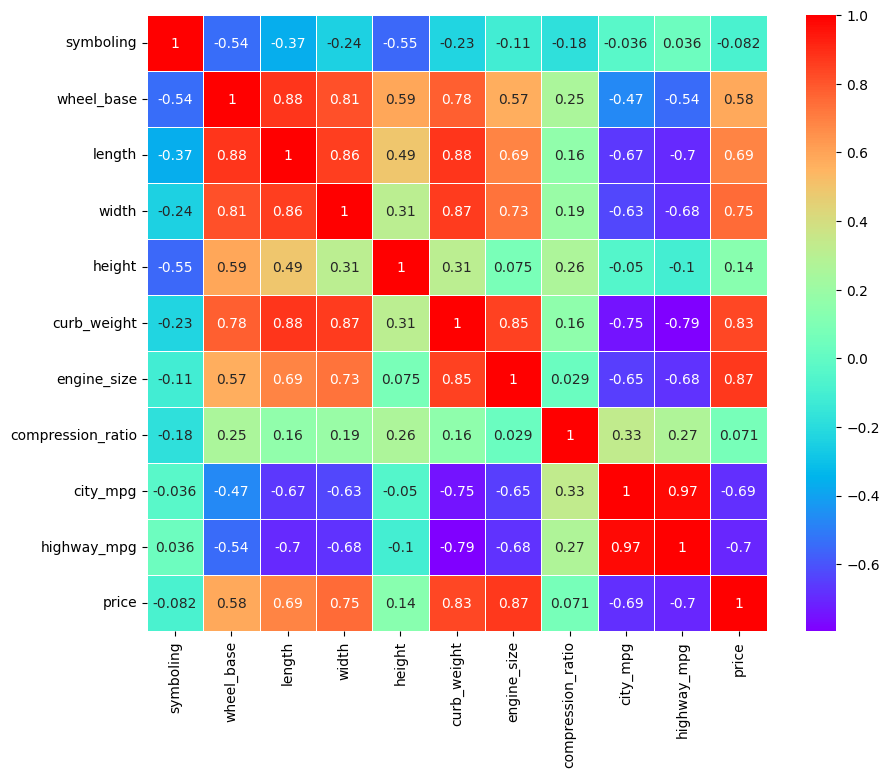

In [139]:
## check corr-relaction 
plt.figure(figsize=(10,8))
sns.heatmap(num_col.corr(),annot=True,linewidth=0.5,cmap='rainbow')

In [140]:
columns_to_remove = ['symboling', 'height', 'compression_ratio' , 'highway_mpg']  # Adjust columns as per your choice
data = data.drop(columns=columns_to_remove)

# Display the updated DataFrame
print("Updated DataFrame after removing columns:")
print(data.head())


Updated DataFrame after removing columns:
   normalized_losses  wheel_base    length     width  curb_weight  \
0           1.793662   -1.767358 -0.460824 -0.929196     0.017775   
1           1.793662   -1.767358 -0.460824 -0.929196     0.017775   
2           1.793662   -0.713342 -0.261932 -0.076094     0.575072   
3           0.284361    0.233485  0.185575  0.350457    -0.409823   
4           0.284361    0.162026  0.185575  0.472328     0.577098   

   engine_size      bore    stroke  horsepower  peak_rpm  ...  make_nissan  \
0     0.353915  0.519433 -2.254920    0.307400 -0.208334  ...        False   
1     0.353915  0.519433 -2.254920    0.307400 -0.208334  ...        False   
2     1.145525 -2.434747  0.743897    1.615550 -0.208334  ...        False   
3    -0.401712 -0.527618  0.478179    0.033601  0.882162  ...        False   
4     0.569809 -0.527618  0.478179    0.429088  0.882162  ...        False   

   make_peugot  make_plymouth  make_porsche  make_renault  make_saab  \
0 

# 9. model creation:-

In [141]:
data.shape

(201, 71)

In [142]:
# step 1:-

In [143]:
# creating input and output variable

In [144]:
X = data.drop('price' , axis = 1)
y = data.price

In [145]:
X.shape

(201, 70)

In [146]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
196    16845
197    19045
198    21485
199    22470
200    22625
Name: price, Length: 201, dtype: int64

In [147]:
# step 2:-

In [148]:
# split the data into training and testing 

In [149]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=14)

In [150]:
X_train.shape

(160, 70)

In [151]:
data.shape

(201, 71)

In [152]:
X_test.shape

(41, 70)

In [153]:
y_train

105    13200
14     30760
58     10595
20      5572
91      7299
       ...  
71     45400
150     7898
12     21105
88      6649
107    13860
Name: price, Length: 160, dtype: int64

In [154]:
data

,normalized_losses,wheel_base,length,width,curb_weight,engine_size,bore,stroke,horsepower,peak_rpm,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,1.793662,-1.767358,-0.460824,-0.929196,0.017775,0.353915,0.519433,-2.254920,0.307400,-0.208334,...,False,False,False,False,False,False,False,False,False,False
1,1.793662,-1.767358,-0.460824,-0.929196,0.017775,0.353915,0.519433,-2.254920,0.307400,-0.208334,...,False,False,False,False,False,False,False,False,False,False
2,1.793662,-0.713342,-0.261932,-0.076094,0.575072,1.145525,-2.434747,0.743897,1.615550,-0.208334,...,False,False,False,False,False,False,False,False,False,False
3,0.284361,0.233485,0.185575,0.350457,-0.409823,-0.401712,-0.527618,0.478179,0.033601,0.882162,...,False,False,False,False,False,False,False,False,False,False
4,0.284361,0.162026,0.185575,0.472328,0.577098,0.569809,-0.527618,0.478179,0.429088,0.882162,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-0.847615,1.894899,1.196609,1.995724,0.836494,0.749720,1.678668,-0.470814,0.398666,0.664063,...,False,False,False,False,False,False,False,False,False,True
197,-0.847615,1.894899,1.196609,1.934788,1.033068,0.749720,1.678668,-0.470814,1.798083,0.445964,...,False,False,False,False,False,False,False,False,False,True
198,-0.847615,1.894899,1.196609,1.995724,0.958086,1.901152,0.930774,-1.533685,1.007108,0.882162,...,False,False,False,False,False,False,False,False,False,True
199,-0.847615,1.894899,1.196609,1.995724,1.373525,0.893649,-1.200723,0.478179,0.155289,-0.644532,...,False,False,False,False,False,False,False,False,False,True


In [155]:
# step 3:-

In [156]:
# import the model

In [157]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train , y_train)


LinearRegression()

In [158]:
# make prediction

In [159]:
y_predict = LR.predict(X_test)
y_predict

array([ 5024.,  9876., 21570.,  9306., 15784., 40722.,  6876., 29482.,
        7898.,  8684.,  6448., 20246., 18192., 15642.,  9400.,  7282.,
       34332., 30142.,  6722., 20878.,  8858., 18578., 32606.,  6390.,
       12406., 20690.,  7094.,  7292., 12972., 11838., 15832.,  6364.,
        9820.,  6044.,  5332.,  8270., 11470.,  7770., 41046., 10086.,
       15354.])

In [160]:
y_test.head()

115     5572
96      8949
199    22470
172    10898
5      15250
Name: price, dtype: int64

In [161]:
LR.coef_

array([ 5.53411522e+02,  1.21356781e+03, -1.03686584e+03, -7.13364320e+01,
        3.21098715e+03, -2.26363448e+03,  1.28011821e+03,  1.10726509e+01,
        5.49068238e+02, -4.19300540e+02,  1.51072138e+02, -8.80563699e+15,
       -8.80563699e+15, -8.80563699e+15, -1.01539478e+17, -8.80563699e+15,
       -8.80563699e+15, -8.80563699e+15, -8.80563699e+15,  2.09824429e+16,
        2.09824429e+16,  2.09824429e+16,  2.09824429e+16,  1.10218690e+16,
        2.09824429e+16, -1.81278810e+15, -1.70546927e+16, -7.09411882e+15,
       -1.70546927e+16,  3.32457262e+16, -1.70546927e+16,  5.74053833e+15,
       -6.47999045e+15, -6.47999045e+15, -6.47999045e+15,  7.03933752e+15,
        7.03933752e+15,  7.03933752e+15,  7.03933752e+15,  7.03933752e+15,
       -1.11859007e+16, -1.11859007e+16,  4.48010133e+16, -5.49940550e+15,
       -1.84826586e+13, -1.84826586e+13,  4.63698769e+16, -4.63639641e+16,
        2.49927258e+15,  2.49927258e+15,  2.49927258e+15,  2.49927258e+15,
        2.49927258e+15,  

In [162]:
LR.intercept_

1.4586601214220084e+16

# evaluation of model:-

In [163]:
# check metrics

In [164]:
## check metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,classification_report

In [165]:
MSE = mean_squared_error(y_test , y_predict)
MSE

7465174.658536585

In [166]:

# MAE
MAE=mean_absolute_error(y_test,y_predict)
MAE

1708.658536585366

In [167]:
#RMSE
rmse=np.sqrt(MSE)
rmse

2732.247181083107

In [168]:
y_predict

array([ 5024.,  9876., 21570.,  9306., 15784., 40722.,  6876., 29482.,
        7898.,  8684.,  6448., 20246., 18192., 15642.,  9400.,  7282.,
       34332., 30142.,  6722., 20878.,  8858., 18578., 32606.,  6390.,
       12406., 20690.,  7094.,  7292., 12972., 11838., 15832.,  6364.,
        9820.,  6044.,  5332.,  8270., 11470.,  7770., 41046., 10086.,
       15354.])

In [169]:
r2score = r2_score(y_test , y_predict)

In [170]:
print("r2score: " ,r2score)

r2score:  0.9233115341662135


In [171]:
# Example calculation for Adjusted R²
R2 = 0.92  # Your R² score
n = len(data)  # Total number of observations in the dataset
p = len(data.columns) - 1  # Number of predictors (independent variables), minus target variable

adjusted_R2 = 1 - ((1 - R2) * (n - 1)) / (n - p - 1)
print(f"Adjusted R² Score: {adjusted_R2}")


Adjusted R² Score: 0.8769230769230769


In [172]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Ridge model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Making predictions
y_pred = ridge_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"MSE: {mse}")


R² Score: 0.9262920255380307
MSE: 9017932.825883184


In [173]:
# decision tress:

In [174]:
from sklearn.tree import DecisionTreeRegressor # importing decision tree from sklearn.tree
dt = DecisionTreeRegressor(max_depth=10) # object creation for decision tree
dt.fit(X_train , y_train) # training the model
dt_predict = dt.predict(X_test) # prediction with x_test


# # 2. Initialize and Train Decision Tree Regressor
# dt = DecisionTreeRegressor(
#     random_state=4,         # Fix randomness
#     max_depth=10,             # Optional: Control depth
#     min_samples_split=10,    # Optional: Minimum samples to split
#     min_samples_leaf=5       # Optional: Minimum samples in a leaf
# )
# dt.fit(X_train, y_train)

# # 3. Predict
# dt_predict = dt.predict(X_test)

# # 4. Evaluate
# mse = mean_squared_error(y_test, dt_predict)
# mae = mean_absolute_error(y_test, dt_predict)
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mae)


In [175]:
r2_score(y_test , dt_predict)

0.8926765151068149

In [176]:
mse = mean_squared_error(y_test, dt_predict)
mae = mean_absolute_error(y_test, dt_predict)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 13130682.052669909
Mean Absolute Error: 2215.4004463574047


In [177]:
#random forest:-

In [178]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train , y_train)
rf_predict = rf.predict(X_test)

In [179]:
r2_score (y_test , rf_predict)

0.8622583993395959

In [180]:
mse = mean_squared_error(y_test , rf_predict)
print("mean squared error: " , mse)

mean squared error:  16852240.360044803


In [181]:
mae = mean_absolute_error(y_test , rf_predict)
print("mean absolute error: " , mae)

mean absolute error:  2538.9133658536584


In [182]:
## check cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,X,y,cv=3,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.6059999  0.5340951  0.69123114]
Cross validation Score: 0.6104420447743785
Std : 0.06422737251955112


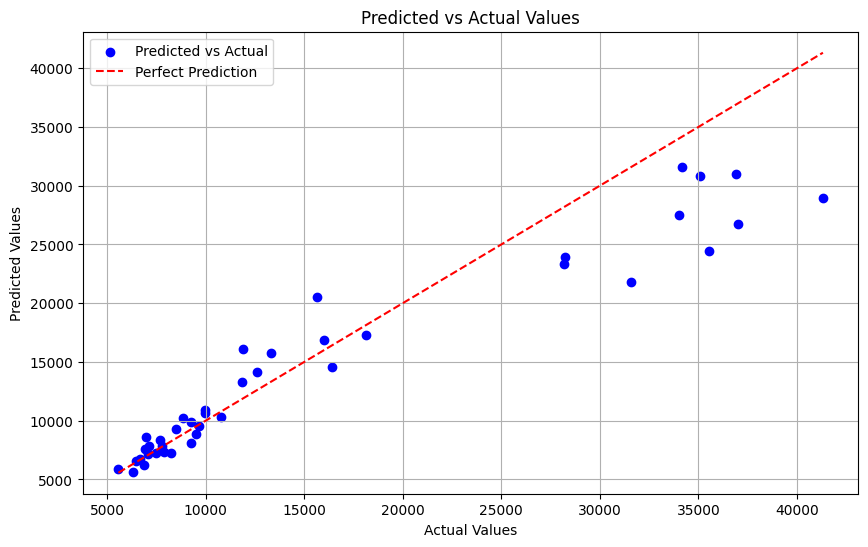

In [183]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predict, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [184]:
## Search Best Paramaters for My Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
              'max_depth':(list(range(1,20))),
              'min_samples_split':(list(range(1,10))),
              'min_samples_leaf':(list(range(1,6))),
              'max_features':['auto','sqrt','log2'],
              'bootstrap':[True,False]
             }


rf2 = RandomForestRegressor()
rand_search = RandomizedSearchCV(estimator=rf2, param_distributions=param_grid, cv=3, scoring='r2', verbose=2,n_jobs=-1,n_iter=100,random_state=42)

rand_search.fit(X_train, y_train)
best_n_estimators = rand_search.best_params_
print(f'Best Paramaters:{best_n_estimators}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Paramaters:{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 13, 'bootstrap': False}


In [185]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators=150,min_samples_split=2,min_samples_leaf=1,max_features='log2',max_depth=13,bootstrap=False)
rf2.fit(X_train,y_train)
rf_pred2 = rf.predict(X_test)


In [186]:
r2_score(y_test,rf_pred2)

0.8622583993395959

In [187]:
mean_squared_error(y_test,rf_pred2)

16852240.360044803

In [188]:
mean_absolute_error(y_test,rf_pred2)

2538.9133658536584

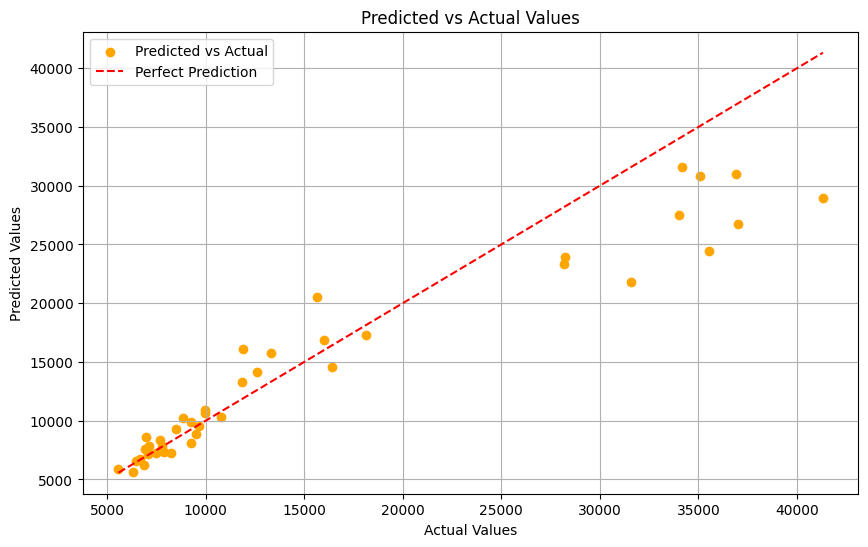

In [189]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred2, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [190]:
## XGB
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=150)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

In [191]:
r2_score(y_test,xgb_pred)

0.9381714594556045

In [192]:
mean_squared_error(y_test,xgb_pred)

7564522.420018976

In [193]:

mean_absolute_error(y_test,xgb_pred)

1695.101229039634

In [194]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=250,
                   learning_rate=0.06,
                   max_depth=8,
                   min_child_weight=4,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   gamma=0.001,
                   reg_alpha=0.1,
                   reg_lambda=1.5,
                   verbosity=2)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print('r2_score:',r2_score(y_test,xgb_pred))
print('MSE:',mean_squared_error(y_test,xgb_pred))
print('MAE:',mean_absolute_error(y_test,xgb_pred))


r2_score: 0.928615219018788
MSE: 8733697.600265794
MAE: 1865.8101895960365


In [195]:
## Bagging
from sklearn.ensemble import BaggingRegressor
bagg = BaggingRegressor()
bagg.fit(X_train,y_train)
bagg_pred = bagg.predict(X_test)


In [196]:
r2_score(y_test,bagg_pred)

0.8893635739649138

In [197]:
mean_absolute_error(y_test,bagg_pred)

2354.6892276422764

In [198]:
mean_squared_error(y_test,bagg_pred)

13536009.710794376

In [199]:
## KNN 
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print('r2_score:',r2_score(y_test,knn_pred))
print('MSE:',mean_squared_error(y_test,knn_pred))
print('MAE:',mean_absolute_error(y_test,knn_pred))

r2_score: 0.7437578507424751
MSE: 31350400.08943089
MAE: 3303.422764227642


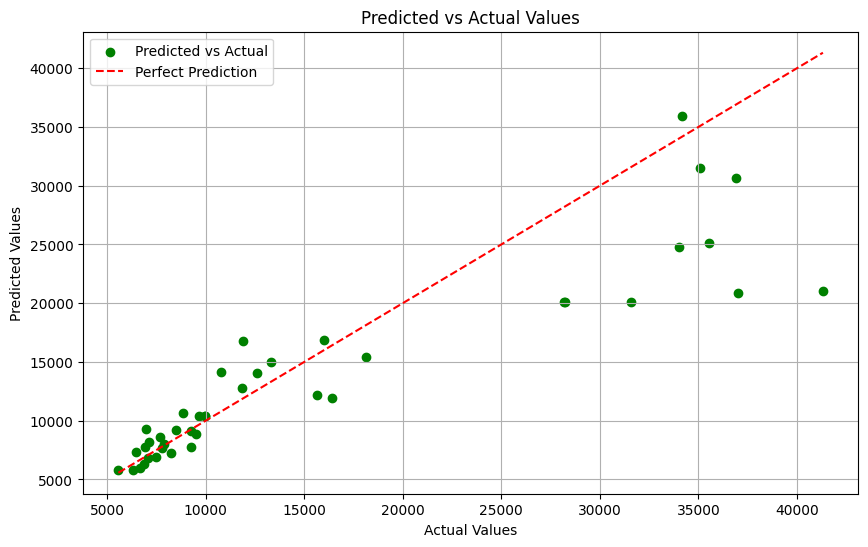

In [200]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [201]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
GB_pred = GB.predict(X_test)
print('r2_score:',r2_score(y_test,GB_pred))
print('MSE:',mean_squared_error(y_test,GB_pred))
print('MAE:',mean_absolute_error(y_test,GB_pred))

r2_score: 0.9423117181307319
MSE: 7057975.13138954
MAE: 1673.38179770612


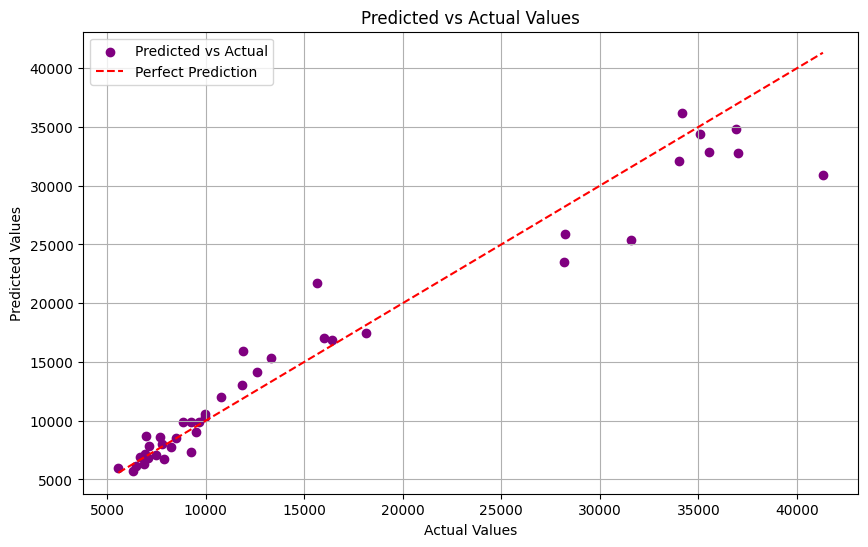

In [202]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, GB_pred, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [203]:
# model comparison
df = pd.DataFrame()
df['Model']=['Linear Regression','Decision Tree','Random Forest','Random Forest Hyperparameter','XGB','XGB Hyperparameter','Bagging','KNN','GradientBoostingRegressor']
df['r2_score'] = [0.923 ,0.928, 0.883, 0.883, 0.938, 0.928, 0.868, 0.743 , 0.934]
df['MAE'] = [1708 , 1734 , 2416 , 2416 , 1695 , 1865 , 2461 , 3303, 1641]

In [204]:
df

,Model,r2_score,MAE
0,Linear Regression,0.923,1708
1,Decision Tree,0.928,1734
2,Random Forest,0.883,2416
3,Random Forest Hyperparameter,0.883,2416
4,XGB,0.938,1695
5,XGB Hyperparameter,0.928,1865
6,Bagging,0.868,2461
7,KNN,0.743,3303
8,GradientBoostingRegressor,0.934,1641


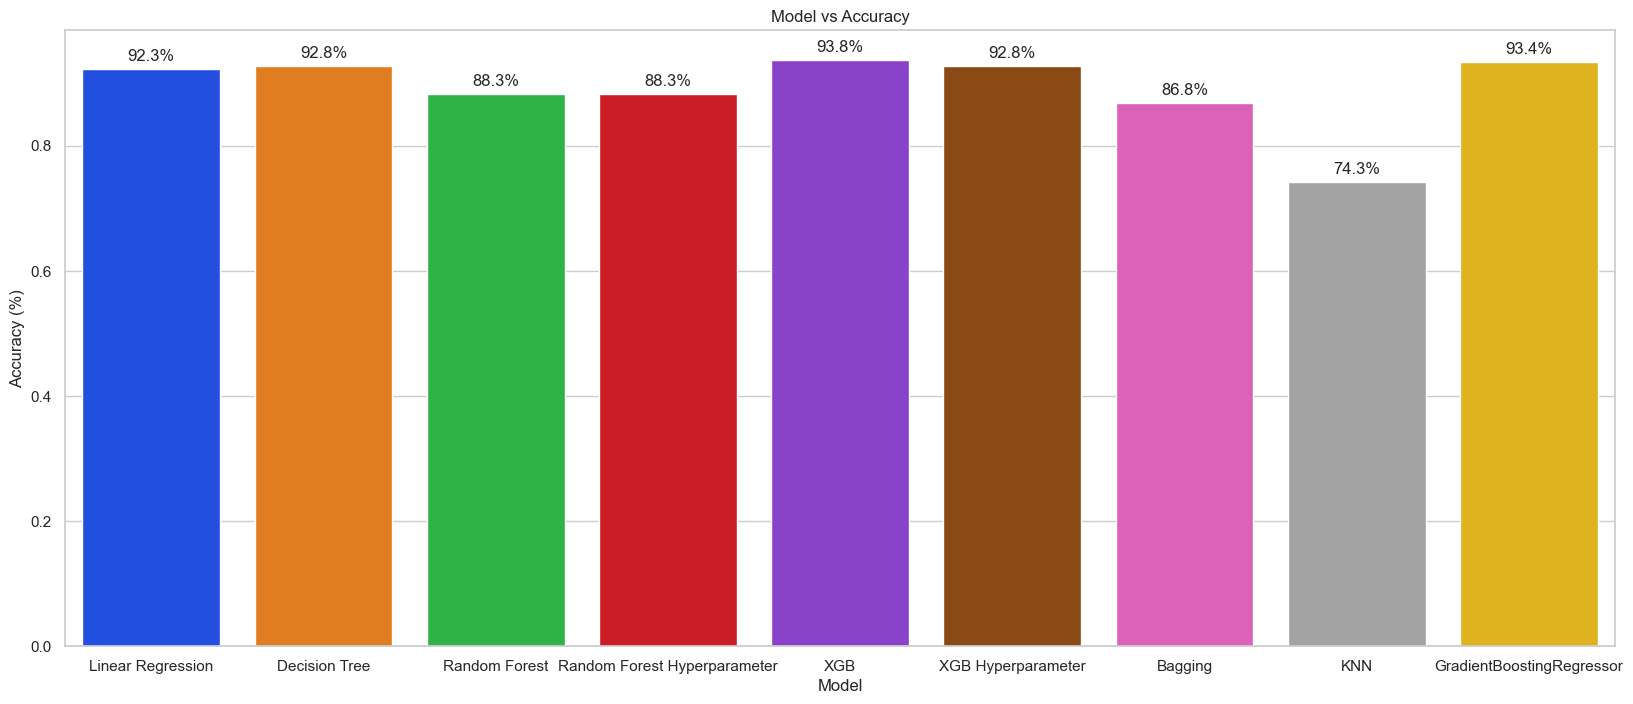

In [205]:
## Visualization 

df = pd.DataFrame()
df['Model']=['Linear Regression','Decision Tree','Random Forest','Random Forest Hyperparameter','XGB','XGB Hyperparameter','Bagging','KNN','GradientBoostingRegressor']
df['r2_score'] = [0.923 ,0.928, 0.883, 0.883, 0.938, 0.928, 0.868, 0.743 , 0.934]


# Create the plot
plt.figure(figsize=(20, 8))
sns.set(style='whitegrid')

# Barplot
bar_plot = sns.barplot(x='Model', y='r2_score', data=df, palette='bright')

# Add text annotations
for p in bar_plot.patches:
    percentage = '{:.1f}%'.format(p.get_height() * 100)  # Convert to percentage
    bar_plot.annotate(percentage, 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9),  # 9 points vertical offset
                      textcoords='offset points')

# Add titles and labels
plt.title('Model vs Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.show()


In [207]:
#Linear regression  desicion tree random forest xgb bagging knn